In [1]:
######################################
# Run First Cell for Initialization  #
#                                    #
#           SHIFT + ENTER            #
######################################

# Initialize notebook
%run -i ./code/02_kinematics/initialize
# Load functions in external python scripts
%load_ext autoreload
%autoreload 1
%aimport refresh

display(Javascript("Jupyter.notebook.execute_cells([3,4,7,8,9,12,13])"))

<IPython.core.display.Javascript object>

# Deformation Gradient

A body (solid continuum) in 3-dimensional space is given by a domain $\Omega\subset\mathbb{R}^3$ as a collection of material points $\boldsymbol{p}$. The body before and after deformation is represented by two different configurations. The reference (initial) configuration describes the undeformed body with material points $\boldsymbol{p}$ with coordinates $\boldsymbol{X}\in\Omega_0\subset\mathbb{R}^3$. A change of shape of the body (deformation) yields the current (deformed) configuration with material points $\boldsymbol{p}'$ with coordinates $\boldsymbol{x}\in\Omega\subset\mathbb{R}^3$.

<img src="files/code/02_kinematics/configurations.JPG" alt="Drawing" style="width: 500px;"/>

Both configurations are connected by the deformation field 
\begin{equation}
\boldsymbol{\phi}:\Omega_0\rightarrow\Omega,\;\boldsymbol{x}=\boldsymbol{\phi}\left(\boldsymbol{X},t\right)
\end{equation}
with the corresponding displacement field 
\begin{equation}
\boldsymbol{u}:\Omega_0\rightarrow\mathbb{R}^3,\;\boldsymbol{u}\left(\boldsymbol{X},t\right)=\boldsymbol{\phi}\left(\boldsymbol{X},t\right)-\boldsymbol{X}=\boldsymbol{x}-\boldsymbol{X}
\end{equation}
Capital letters denote the reference configuration, and smallercase letters denote the deformed configuration. A first order Taylor series approximation of the mapping $\boldsymbol{\phi}$
\begin{equation}
\boldsymbol{x}+d\boldsymbol{x}=\boldsymbol{\phi}\left(\boldsymbol{X}+d\boldsymbol{X}\right)\approx\boldsymbol{\phi}\left(\boldsymbol{X}\right)+\frac{d\boldsymbol{\phi}\left(\boldsymbol{X}\right)}{d\boldsymbol{X}}d\boldsymbol{X}=\boldsymbol{x}+\nabla_{\boldsymbol{X}}\boldsymbol{\phi}\left(\boldsymbol{X}\right)d\boldsymbol{X}
\end{equation}
gives an approximation of the deformation of line elements $d\boldsymbol{x}$ by
\begin{equation}
d\boldsymbol{x}\approx\nabla_{\boldsymbol{X}}\boldsymbol{\phi}=\left(\boldsymbol{X}\right)d\boldsymbol{X}
\end{equation}

The second order tensor $\boldsymbol{F}:=\nabla_{\boldsymbol{X}}\boldsymbol{\phi}\left(\boldsymbol{X}\right)=\nabla_\boldsymbol{X}\boldsymbol{x}\left(\boldsymbol{X}\right)=\boldsymbol{I}+\nabla_\boldsymbol{X}\boldsymbol{u}\left(\boldsymbol{X}\right)$ defines the deformation gradient. The deformation gradient is the linearization of the mapping between reference and current deformation.

The gradient operator corresponds to the componentwise derivative of the deformed vector $\boldsymbol{x}$ with respect to the undeformed vector $\boldsymbol{X}$
\begin{equation}
 F_{ij}=x_{i,j}=   \frac{\partial x_i}{\partial X_j} =
 \begin{bmatrix}
   \frac{\partial x_1}{\partial X_1} &
   \frac{\partial x_1}{\partial X_2} & \frac{\partial x_1}{\partial X_3} \\
   \frac{\partial x_2}{\partial X_1} &
   \frac{\partial x_2}{\partial X_2} & \frac{\partial x_2}{\partial X_3} \\
      \frac{\partial x_3}{\partial X_1} &
   \frac{\partial x_3}{\partial X_2} & \frac{\partial x_3}{\partial X_3} \\
   \end{bmatrix}
   \end{equation}

In the following we will restrict to plane stress states.

The most simple deformation is stretching along the axes directions. Elongation in the 1-direction by 100% and elongation in the 2-direction by 60% is given by the deformation field
\begin{equation}
x_1=2.0\cdot X + 0.0 \cdot Y
\\
x_2=0.0 \cdot X + 1.6 \cdot Y
\end{equation}
which gives the deformation gradient
\begin{equation}
\boldsymbol{F}=
 \begin{bmatrix}
   2 & 0 \\
   0 & 1.6
   \end{bmatrix}
   \end{equation}
   
## Polar Decomposition

The deformation gradient can be uniquely composed into a part which rotates the body, and a part which changes the shape of the body. This multiplicative decomposition is called polar decomposition, which results in 
\begin{equation}
\boldsymbol{F}=\boldsymbol{R}\cdot\boldsymbol{U}=\boldsymbol{v}\cdot\boldsymbol{R}
\end{equation}
The symbol $\boldsymbol{R}$ denotes the unimodular, orthogonal rotation tensor, i.e. $\boldsymbol{R}^T\cdot\boldsymbol{R}=\boldsymbol{R}\cdot\boldsymbol{R}^T=\boldsymbol{I}$ and $\text{det}\left(\boldsymbol{R}\right)=1$. The symbols $\boldsymbol{U}$ and $\boldsymbol{v}$ denote the right and left stretch tensors, respectively. Both are symmetric positive definit.

## Volume Change

The volumetric strain is given by the determinant of the deformation gradient $J:=\text{det}\left(\boldsymbol{F}\right)>0$. At volume preserving deformations which we know from (nearly) incompressible materials, the Jacobian determinant equals one.

The deformation gradient can further be composed into a part which changes the volume, and a part which changes the shape of body while preserving the volume, which is called deviatoric deformation.
\begin{equation}
\boldsymbol{F}=\boldsymbol{R}\cdot\boldsymbol{U}=\boldsymbol{R}\cdot\boldsymbol{U}_{dev}\cdot\boldsymbol{U}_{vol}
\end{equation}
The deviatoric stretch tensor is unimodular, i.e. $\text{det}\left(\boldsymbol{U}_{dev}\right)=1$. The volumetric stretch tensor can be expressed with the scaled second order unit tensor $\boldsymbol{U}_{vol}=\epsilon_{vol}\cdot\boldsymbol{I}$


The following examples are restricted to plane strain deformation states.


In [2]:
%run -i ./code/02_kinematics/F_input

interactive(children=(FloatSlider(value=1.0, description='F11', max=2.0, min=0.5), FloatSlider(value=1.0, desc…

Button(description='Refresh', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Rotation Tensor
[[1.00000000e+00 8.86511593e-17 0.00000000e+00]
 [8.86511593e-17 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Left Stretch Tensor
[[1.1     0.29999 0.     ]
 [0.29999 1.1     0.     ]
 [0.      0.      1.     ]]


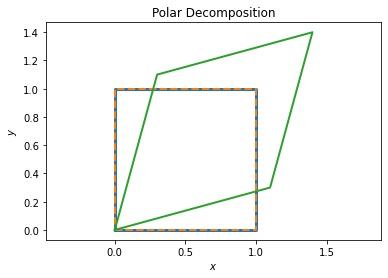

J
1.1200059998999998


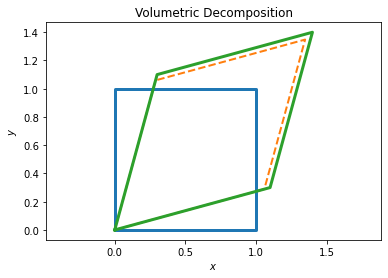

In [37]:
%run -i ./code/02_kinematics/F_eval
%run -i ./code/02_kinematics/F_dev_output
%run -i ./code/02_kinematics/F_vol_output

# Strain Measures

At deformation, the length of the infinitesimal line element $d\boldsymbol{X}$ is changed. The change of length between the infinitesimal line element in the reference configuration $d\boldsymbol{X}$ and the length of the line element $d\boldsymbol{x}$ in the deformed configuration leads to
\begin{equation}
||d\boldsymbol{x}||^2-||d\boldsymbol{X}||^2=d\boldsymbol{x}\cdot d\boldsymbol{x}-d\boldsymbol{X}\cdot d\boldsymbol{X}
\\
=\left(\boldsymbol{F}d\boldsymbol{X}\right)^T\left(\boldsymbol{F}d\boldsymbol{X}\right)-d\boldsymbol{X}^Td\boldsymbol{X}=d\boldsymbol{X}^T\left(\boldsymbol{F}^T\boldsymbol{F}-\boldsymbol{I}\right)d\boldsymbol{X}
\end{equation}
With the right Cauchy-Green strain tensor $\boldsymbol{C}:=\boldsymbol{F}^T\boldsymbol{F}$. 

Therefore the so called Green-Lagrange strain tensor
\begin{equation}
\boldsymbol{E}=\frac{1}{2}\left(\boldsymbol{F}^T\boldsymbol{F}-\boldsymbol{I}\right)
\end{equation}
is a measure for the change of length of an infinitesimal line element with respect to the material configuration.

The change of length can also be expressed with respect to the spatial configuration, leading to the Euler-Almansi strain tensor
\begin{equation}
\boldsymbol{e}=\frac{1}{2}\left(\boldsymbol{I}-\left(\boldsymbol{F}\boldsymbol{F}^T\right)^{-1}\right)
\end{equation}


As both strain tensors belong to different configurations, their numerical values are different. Only for small deformations, both strain tensors are equal, and can be approximated by the infinitesimal strain tensor
\begin{equation}
\boldsymbol{\epsilon}=\frac{1}{2}\left(\boldsymbol{F}^T+\boldsymbol{F}\right)-\boldsymbol{I}
\end{equation}

In [38]:
%run -i ./code/02_kinematics/strain_measures_eval

Green-Lagrange Strain Tensor
[[0.149997 0.329989 0.      ]
 [0.329989 0.149997 0.      ]
 [0.       0.       0.      ]]
Euler-Almansi Strain Tensor
[[-0.01816808  0.26306239  0.        ]
 [ 0.26306239 -0.01816808  0.        ]
 [ 0.          0.          0.        ]]
Linearized Strain Tensor
[[0.1     0.29999 0.     ]
 [0.29999 0.1     0.     ]
 [0.      0.      0.     ]]


In [5]:
%run -i ./code/02_kinematics/strain_measures_input

interactive(children=(FloatSlider(value=0.5, description='shear', max=0.5, min=0.01, step=0.01), FloatSlider(v…

Button(description='Refresh', style=ButtonStyle())

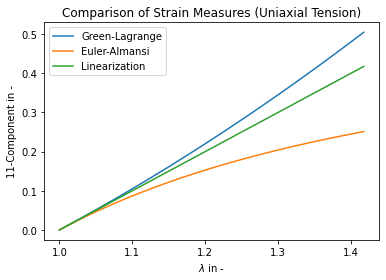

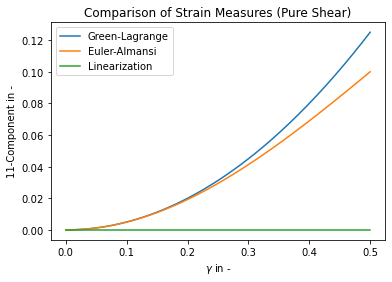

In [6]:
%run -i ./code/02_kinematics/strain_measures_plot

# Eigenvalues and  Invariants

invarianten als betrachterunabhängige größen

maß für art der deformation

eigenwert: dehnung im hauptachsensystem

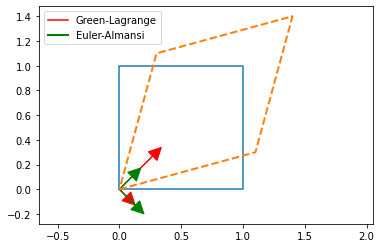

Eigenvalues Green-Lagrange
[ 0.479986 -0.179992  0.      ]
Eigenvalues Euler-Almansi
[ 0.24489431 -0.28123047  0.        ]


In [39]:
%run -i ./code/02_kinematics/eigenvalues_output

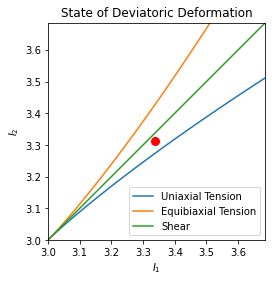

In [40]:
%run -i ./code/02_kinematics/deformation_state_output

# Further Information

Holzapfel, G. (2000). Nonlinear solid mechanics: a continuum approach for engineering.

Destrade, M. et al. (2012). Simple shear is not so simple.

Baaser, H. et al. (2013). Reformulation of strain invariants at incompressibility.